# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

# 1.0 Normal Equation

A **"closed-form"** solution that gives the result directly i.e. the value of **θ** that minimizes the cost function of Linear Regression. 

**θ = (X^T X)^-1 X^T y**

where:

- **θ** is the vector of parameters we want to estimate
- **X** is the design matrix, where each row corresponds to one instance, and each column corresponds to one feature
- **y** is the target vector, containing the target values for each instance.

## 1.1 Generate some linear-looking data

In [2]:
# Generating some linear looking data

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)  # 4 + 3x1 + Gaussian Noise

In [3]:
# Shape of X and y

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
X.flatten()

array([1.58021074, 0.07486173, 1.08690433, 0.22609006, 1.98706281,
       0.19657327, 0.46289745, 1.36883179, 1.93051642, 0.52642435,
       1.72018952, 1.51595243, 1.35061283, 0.84674753, 1.72603786,
       0.40884056, 1.87375759, 0.0179269 , 0.21209086, 1.61510981,
       1.73474542, 0.10175413, 0.73785203, 0.74130746, 1.27062318,
       1.4843172 , 0.01292624, 1.48814268, 0.80132829, 0.19941999,
       1.23891822, 0.64486929, 0.93705906, 1.85461118, 1.96976277,
       0.05742416, 1.42901033, 0.79450538, 1.92094342, 1.22455809,
       0.57810188, 1.26105415, 0.82034017, 1.70490828, 1.96556347,
       0.43789048, 1.76963226, 0.94535091, 1.75329929, 1.04416384,
       0.18004975, 0.26068021, 0.45577487, 1.04783222, 1.77887303,
       0.43406947, 0.90171701, 1.84210793, 1.31178927, 1.87484734,
       1.47925691, 1.64990205, 0.90961947, 0.26178471, 0.6334019 ,
       1.73172762, 1.36482937, 1.50781891, 0.89992091, 0.25065088,
       1.85633178, 1.43290282, 1.90002124, 0.5576864 , 1.55563

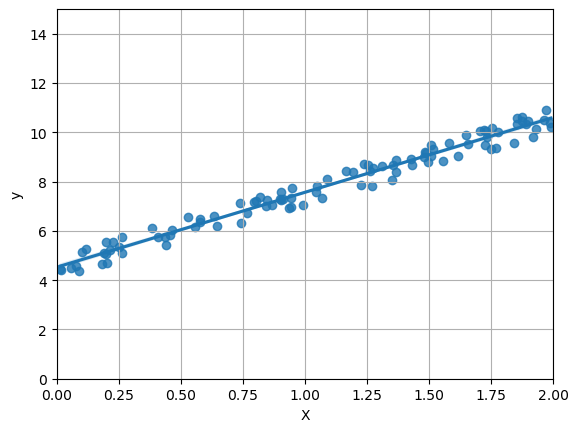

In [5]:
# Visualizing the above data

# sns.scatterplot(x=X.flatten(), y=y.flatten())
sns.regplot(x=X.flatten(), y=y.flatten())  # Scatterplot w a fitted regression line
plt.axis([0, 2, 0, 15])
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## 1.2 Computing θ best

In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # (X.T X)^-1 X.T y <-- "Closed form"
theta_best

array([[4.53146067],
       [3.03504244]])

**=>** We hoped for getting θo=4 and θ1=3 but we did get what we get because of the **gaussian noise**.  

**Note:** The reason we added the extra feature to the input data is to be able to use matrix multiplication to compute the linear equation for the predictions. Without the extra feature, we would need to compute the bias term and the weight term separately, and add them together to get the prediction. By adding the extra feature, we can compute the bias and weight terms together as a single vector, which simplifies the computation and makes the code more concise.

## 1.3 Making predictions using θ best

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_hat = X_new_b.dot(theta_best)
y_hat

array([[ 4.53146067],
       [10.60154554]])

## 1.4 Plotting Model's predictions

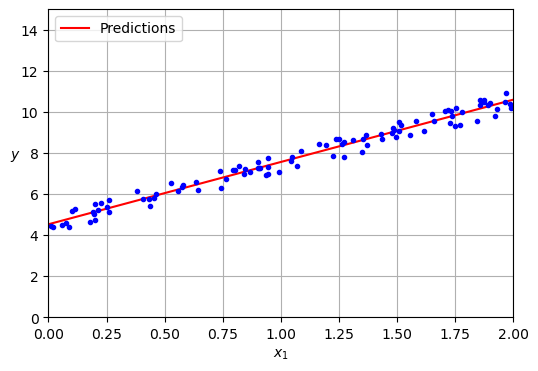

In [8]:
# Plotting the scatter-plot with the regression line

# slope = theta_best[1][0]
# intercept = theta_best[0][0]

# sns.lmplot(data=pd.DataFrame(np.c_[X, y], columns=['X', 'y']), 
#            x='X', 
#            y='y', 
#            line_kws={'label':f'y={slope:.1f}x + {intercept:.1f}'}, 
#            scatter_kws={'s': 20}  # to adjust the size of scatter plot points
#           )
# plt.axis([0, 2, 0, 15])
# plt.show()

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_hat, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

## 1.5 Performing Linear Regression using Scikit-Learn

In [9]:
# Performing Scikit-Learn's implementation of Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_b, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.53146067]), array([[0.        , 3.03504244]]))

In [10]:
lin_reg.predict(X_new_b)

array([[ 4.53146067],
       [10.60154554]])

**Note:** The Linear Regression class is based on the **'scipy.linalg.lstsq()'** function (the name stands for "least squares").